#### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset

In [2]:
import os

In [3]:
print(os.getcwd())  # get current working directory

C:\Users\Dell\Downloads\Imarticus_Work\PGA33\ML\Log_Reg\Project


In [4]:
os.chdir('E:\\dataset')  # chdir - change directory

In [5]:
print(os.getcwd())

E:\dataset


In [6]:
print(os.listdir())  # list all the files in the current folder

['h1n1_vaccine_prediction.csv']


In [8]:
df = pd.read_csv('h1n1_vaccine_prediction.csv')
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [9]:
df.shape

(26707, 34)

### Data Preprocessing 

In [10]:
df1 = df.copy()

#### 1) Handle Null values

In [11]:
nv = df.isnull().sum()
nv = nv[nv>0]
nv

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
qualification                 1407
income_level                  4423
marital_status                1408
housing_status                2042
employment                    1463
no_of_adults                   249
no_of_children                 249
dtype: int64

In [12]:
def null_value_per(data):
    nv = data.isnull().sum()
    nv = nv[nv>0]
    nv_df = pd.DataFrame({'Feature':nv.index,'NullCount':nv.values,
                         'PerNull':(nv.values/data.shape[0])*100})
    nv_df = nv_df.sort_values('PerNull',ascending=False)
    return nv_df

In [13]:
res1 = null_value_per(df)
res1

,Feature,NullCount,PerNull
14,has_health_insur,12274,45.957989
22,income_level,4423,16.561201
10,dr_recc_seasonal_vacc,2160,8.087767
9,dr_recc_h1n1_vacc,2160,8.087767
24,housing_status,2042,7.645936
25,employment,1463,5.477965
23,marital_status,1408,5.272026
21,qualification,1407,5.268282
11,chronic_medic_condition,971,3.635751
12,cont_child_undr_6_mnths,820,3.070356


In [14]:
nv_gt7_per = res1['Feature'][res1['PerNull']>7].values
print(nv_gt7_per)

['has_health_insur' 'income_level' 'dr_recc_seasonal_vacc'
 'dr_recc_h1n1_vacc' 'housing_status']


In [15]:
for i in nv_gt7_per:
    print('Feature',i)
    print(df[i].value_counts())

Feature has_health_insur
1.0    12697
0.0     1736
Name: has_health_insur, dtype: int64
Feature income_level
<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_level, dtype: int64
Feature dr_recc_seasonal_vacc
0.0    16453
1.0     8094
Name: dr_recc_seasonal_vacc, dtype: int64
Feature dr_recc_h1n1_vacc
0.0    19139
1.0     5408
Name: dr_recc_h1n1_vacc, dtype: int64
Feature housing_status
Own     18736
Rent     5929
Name: housing_status, dtype: int64


In [16]:
res1.head()

,Feature,NullCount,PerNull
14,has_health_insur,12274,45.957989
22,income_level,4423,16.561201
10,dr_recc_seasonal_vacc,2160,8.087767
9,dr_recc_h1n1_vacc,2160,8.087767
24,housing_status,2042,7.645936


In [17]:
# df['has_health_insur'].value_counts(normalize=True)

In [18]:
df.drop(nv_gt7_per,axis=1,inplace=True)
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'marital_status', 'employment', 'census_msa',
       'no_of_adults', 'no_of_children', 'h1n1_vaccine'],
      dtype='object')

In [19]:
null_value_per(df)

,Feature,NullCount,PerNull
20,employment,1463,5.477965
19,marital_status,1408,5.272026
18,qualification,1407,5.268282
9,chronic_medic_condition,971,3.635751
10,cont_child_undr_6_mnths,820,3.070356
11,is_health_worker,804,3.010447
17,sick_from_seas_vacc,537,2.010709
16,is_seas_risky,514,1.924589
15,is_seas_vacc_effective,462,1.729884
14,sick_from_h1n1_vacc,395,1.479013


In [20]:
df.dropna(inplace=True)
null_value_per(df)

,Feature,NullCount,PerNull


In [21]:
df.shape

(24002, 29)

#### Percentage of data loss(in Rows)

In [22]:
print(((26707 - df.shape[0])/26707)*100)

10.128430748492905


#### 3) Handle Duplicates

In [23]:
df.duplicated().sum()

0

#### 4) Handling data Inconsistency

In [24]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
marital_status                object
employment                    object
census_msa                    object
no_of_adults                 float64
n

In [25]:
df.head(3)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,age_bracket,qualification,race,sex,marital_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,55 - 64 Years,< 12 Years,White,Female,Not Married,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,35 - 44 Years,12 Years,White,Male,Not Married,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,18 - 34 Years,College Graduate,White,Male,Not Married,Employed,"MSA, Not Principle City",2.0,0.0,0


In [26]:
cat_cols = df.select_dtypes(include='object').columns
# num_cols = df.dtypes[df.dtypes!='object'].index
num_cols = df.select_dtypes(exclude='object').columns
print(cat_cols)
print(num_cols)

Index(['age_bracket', 'qualification', 'race', 'sex', 'marital_status',
       'employment', 'census_msa'],
      dtype='object')
Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine'],
      dtype='object')


### EDA

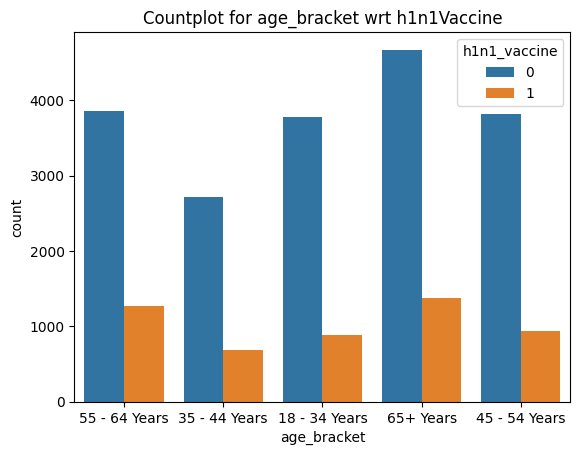

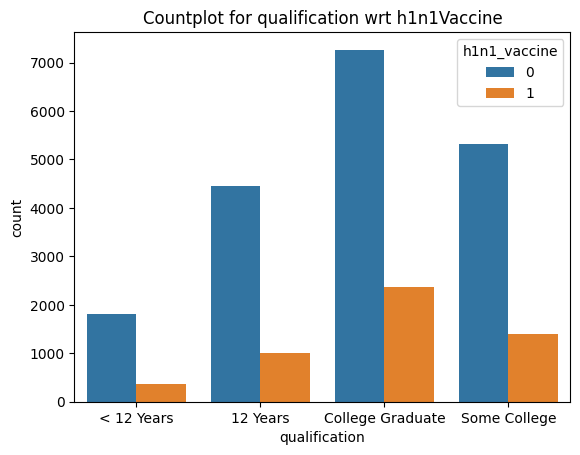

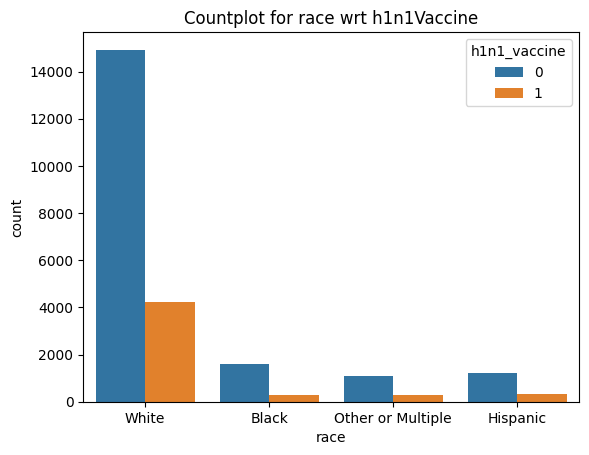

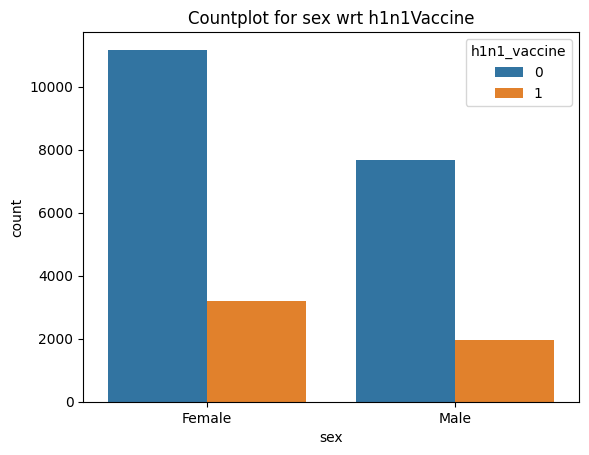

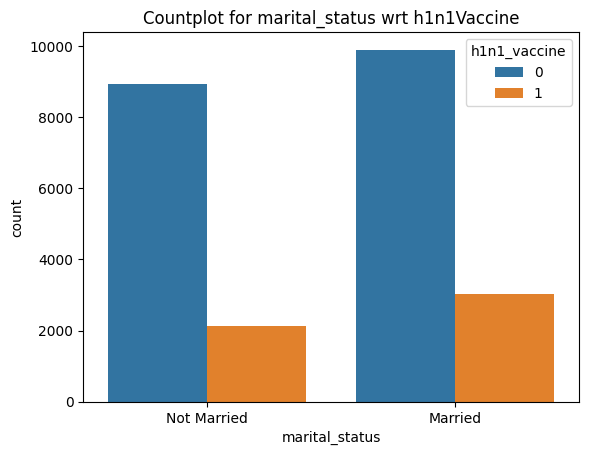

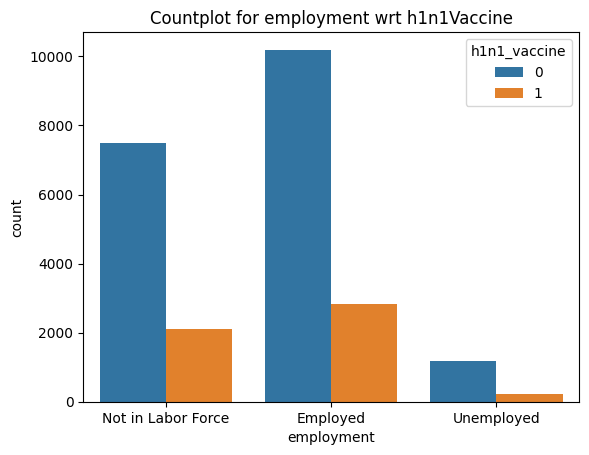

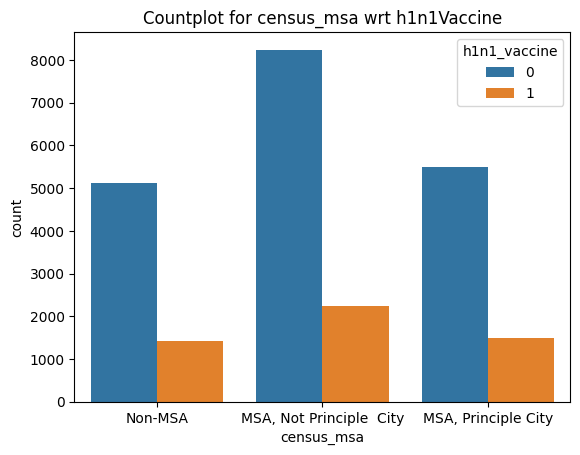

In [27]:
for i in cat_cols:
    plt.title(f'Countplot for {i} wrt h1n1Vaccine')
    sns.countplot(x=df[i],hue=df['h1n1_vaccine'])
    plt.show()

#### Inferences
1) 65+yrs age bracket has higher respondents who are vaccinated.

In [55]:
print(num_cols)

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine'],
      dtype='object')


In [61]:
r = df['h1n1_awareness'].value_counts()
print(r)

1.0    13256
2.0     8762
0.0     1984
Name: h1n1_awareness, dtype: int64


In [62]:
print(r.index)
print(r.values)

Float64Index([1.0, 2.0, 0.0], dtype='float64')
[13256  8762  1984]


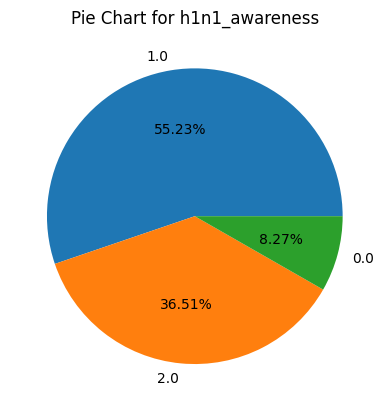

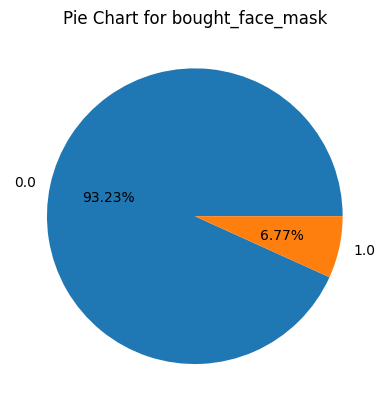

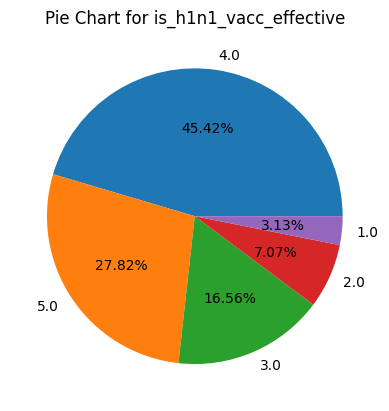

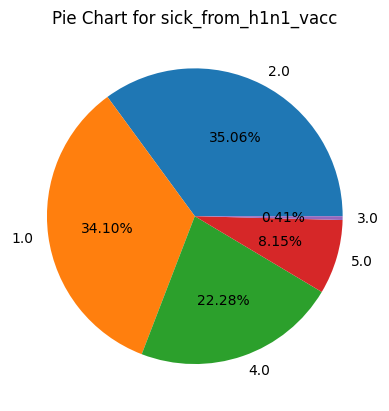

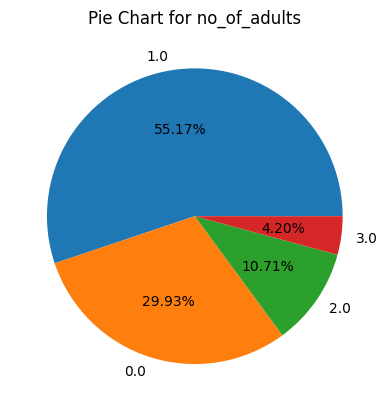

In [63]:
for i in ['h1n1_awareness','bought_face_mask','is_h1n1_vacc_effective',
         'sick_from_h1n1_vacc', 'no_of_adults']:
    plt.title(f'Pie Chart for {i}')
    x = df[i].value_counts()
    plt.pie(x.values, labels = x.index,autopct="%.2f%%")
    plt.show()

#### Drop Unique_ID

In [35]:
df.drop('unique_id',axis=1,inplace=True)
df.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'marital_status', 'employment', 'census_msa',
       'no_of_adults', 'no_of_children', 'h1n1_vaccine'],
      dtype='object')

In [36]:
print(dir(df))

['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__dataframe__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmatmul__', '__rmod__', '__rmul_

In [37]:
df2 = df.copy()
df1.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [38]:
df2.sort_index(axis=1,inplace=True)
df2.head(2)

,age_bracket,antiviral_medication,avoid_large_gatherings,avoid_touch_face,bought_face_mask,census_msa,chronic_medic_condition,cont_child_undr_6_mnths,contact_avoidance,employment,...,marital_status,no_of_adults,no_of_children,qualification,race,reduced_outside_home_cont,sex,sick_from_h1n1_vacc,sick_from_seas_vacc,wash_hands_frequently
0,55 - 64 Years,0.0,0.0,1.0,0.0,Non-MSA,0.0,0.0,0.0,Not in Labor Force,...,Not Married,0.0,0.0,< 12 Years,White,1.0,Female,2.0,2.0,0.0
1,35 - 44 Years,0.0,0.0,1.0,0.0,"MSA, Not Principle City",0.0,0.0,1.0,Employed,...,Not Married,0.0,0.0,12 Years,White,1.0,Male,4.0,4.0,1.0


In [39]:
df2.columns

Index(['age_bracket', 'antiviral_medication', 'avoid_large_gatherings',
       'avoid_touch_face', 'bought_face_mask', 'census_msa',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'contact_avoidance', 'employment', 'h1n1_awareness', 'h1n1_vaccine',
       'h1n1_worry', 'is_h1n1_risky', 'is_h1n1_vacc_effective',
       'is_health_worker', 'is_seas_risky', 'is_seas_vacc_effective',
       'marital_status', 'no_of_adults', 'no_of_children', 'qualification',
       'race', 'reduced_outside_home_cont', 'sex', 'sick_from_h1n1_vacc',
       'sick_from_seas_vacc', 'wash_hands_frequently'],
      dtype='object')

In [40]:
df2.head(3)

,age_bracket,antiviral_medication,avoid_large_gatherings,avoid_touch_face,bought_face_mask,census_msa,chronic_medic_condition,cont_child_undr_6_mnths,contact_avoidance,employment,...,marital_status,no_of_adults,no_of_children,qualification,race,reduced_outside_home_cont,sex,sick_from_h1n1_vacc,sick_from_seas_vacc,wash_hands_frequently
0,55 - 64 Years,0.0,0.0,1.0,0.0,Non-MSA,0.0,0.0,0.0,Not in Labor Force,...,Not Married,0.0,0.0,< 12 Years,White,1.0,Female,2.0,2.0,0.0
1,35 - 44 Years,0.0,0.0,1.0,0.0,"MSA, Not Principle City",0.0,0.0,1.0,Employed,...,Not Married,0.0,0.0,12 Years,White,1.0,Male,4.0,4.0,1.0
2,18 - 34 Years,0.0,0.0,0.0,0.0,"MSA, Not Principle City",1.0,0.0,1.0,Employed,...,Not Married,2.0,0.0,College Graduate,White,0.0,Male,1.0,2.0,0.0


In [41]:
# df2.truncate(before="census_msa", axis="columns")

In [42]:
df2.pop('antiviral_medication')
df2.head()

,age_bracket,avoid_large_gatherings,avoid_touch_face,bought_face_mask,census_msa,chronic_medic_condition,cont_child_undr_6_mnths,contact_avoidance,employment,h1n1_awareness,...,marital_status,no_of_adults,no_of_children,qualification,race,reduced_outside_home_cont,sex,sick_from_h1n1_vacc,sick_from_seas_vacc,wash_hands_frequently
0,55 - 64 Years,0.0,1.0,0.0,Non-MSA,0.0,0.0,0.0,Not in Labor Force,0.0,...,Not Married,0.0,0.0,< 12 Years,White,1.0,Female,2.0,2.0,0.0
1,35 - 44 Years,0.0,1.0,0.0,"MSA, Not Principle City",0.0,0.0,1.0,Employed,2.0,...,Not Married,0.0,0.0,12 Years,White,1.0,Male,4.0,4.0,1.0
2,18 - 34 Years,0.0,0.0,0.0,"MSA, Not Principle City",1.0,0.0,1.0,Employed,1.0,...,Not Married,2.0,0.0,College Graduate,White,0.0,Male,1.0,2.0,0.0
3,65+ Years,1.0,0.0,0.0,"MSA, Principle City",1.0,0.0,1.0,Not in Labor Force,1.0,...,Not Married,0.0,0.0,12 Years,White,0.0,Female,5.0,1.0,1.0
4,45 - 54 Years,1.0,1.0,0.0,"MSA, Not Principle City",0.0,0.0,1.0,Employed,1.0,...,Married,1.0,0.0,Some College,White,0.0,Female,2.0,4.0,1.0


In [43]:
# print(dir(df))

In [44]:
# df2.dot()

#### Correlation

C:\Users\Dell\AppData\Local\Temp\ipykernel_29908\1269641288.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


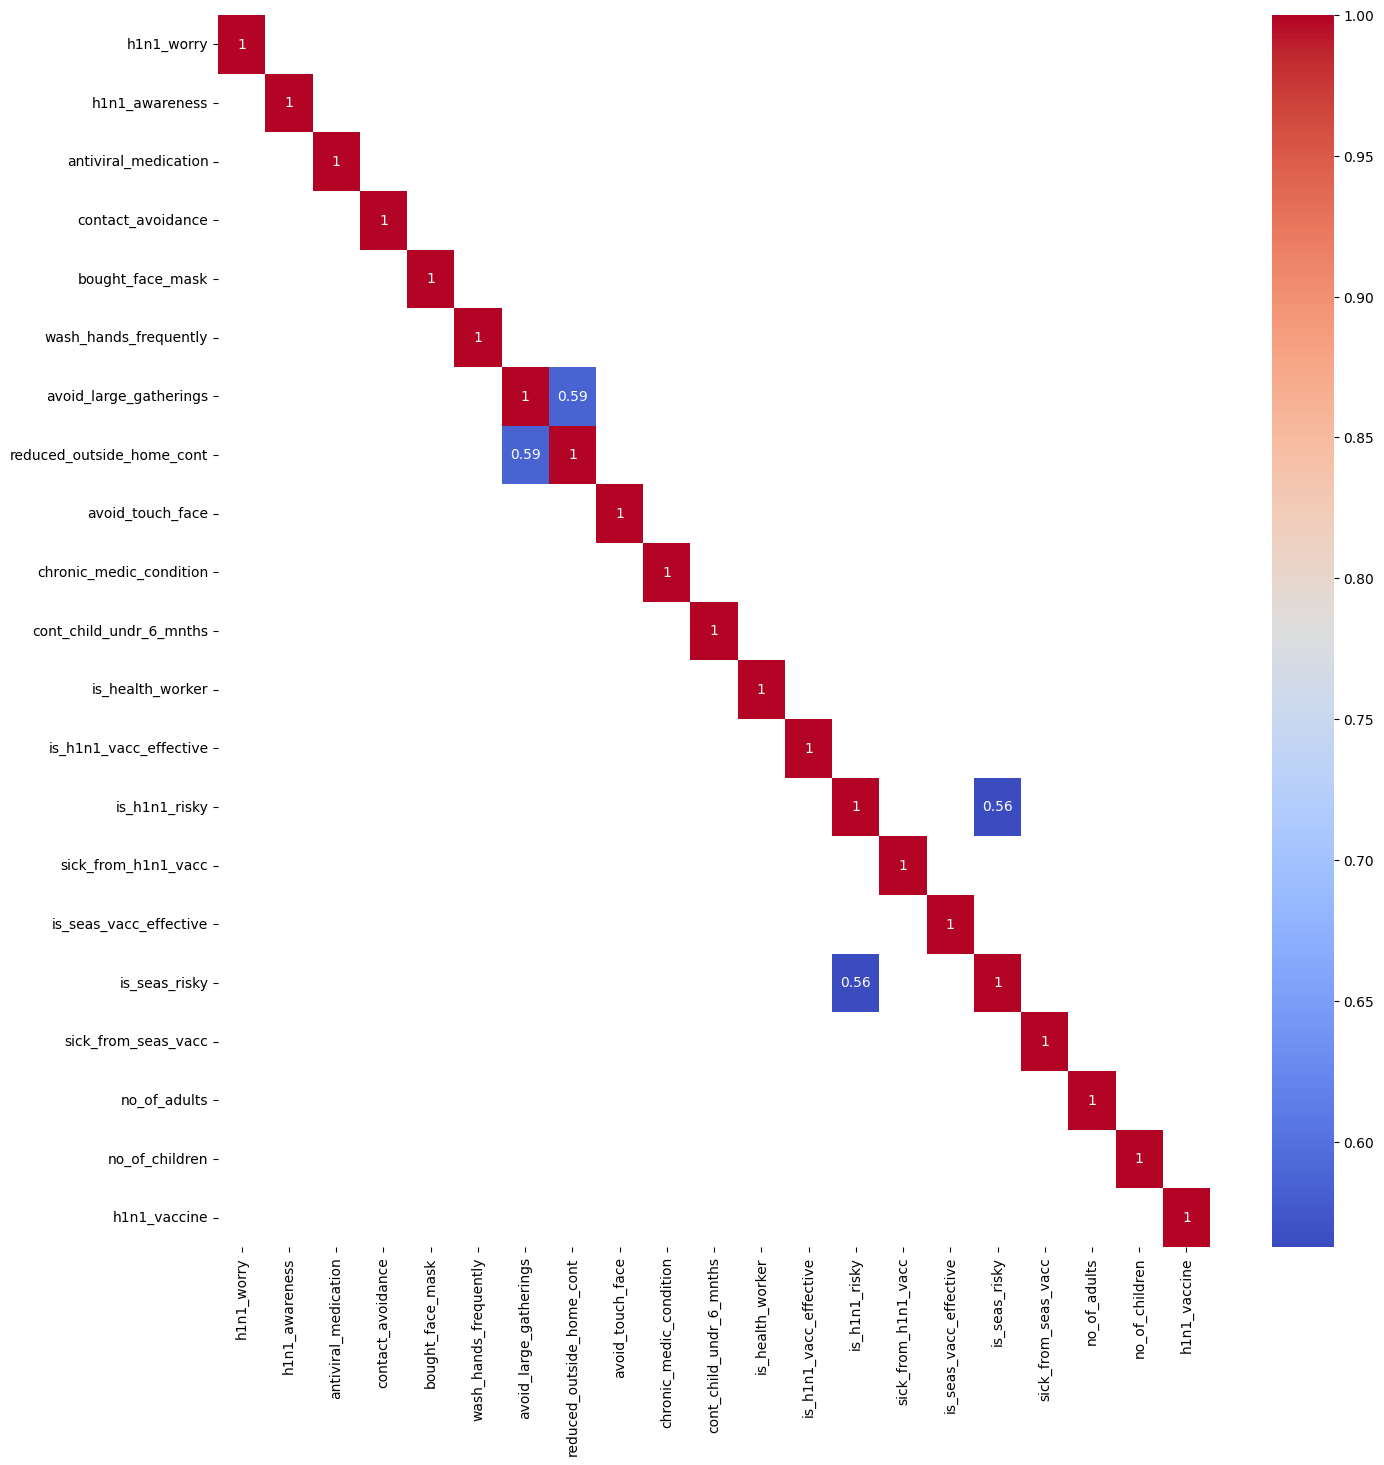

In [45]:
corr = df.corr()

plt.figure(figsize=(16,16))
sns.heatmap(corr[abs(corr)>0.5],annot=True,cmap='coolwarm')
plt.show()

In [46]:
df.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'marital_status', 'employment', 'census_msa',
       'no_of_adults', 'no_of_children', 'h1n1_vaccine'],
      dtype='object')

#### Encoding Catgeorical Columns

In [47]:
df_dum = pd.get_dummies(df,columns=cat_cols,drop_first=True)
print(len(df_dum.columns))
df_dum.columns

37


Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine', 'age_bracket_35 - 44 Years',
       'age_bracket_45 - 54 Years', 'age_bracket_55 - 64 Years',
       'age_bracket_65+ Years', 'qualification_< 12 Years',
       'qualification_College Graduate', 'qualification_Some College',
       'race_Hispanic', 'race_Other or Multiple', 'race_White', 'sex_Male',
       'marital_status_Not Married', 'employment_Not in Labor Force',
       'employment_Unemployed', 'census_msa_MSA, Principle City',
       'census_msa_Non-MSA'],
      dtype='object')

#### Select x(dependent variable) and y(independent variable)

In [48]:
x = df_dum.drop('h1n1_vaccine',axis=1)
y = df_dum['h1n1_vaccine']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(24002, 36)
(24002,)


#### Split data into train and test

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16801, 36)
(7201, 36)
(16801,)
(7201,)


#### Model Building

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
from  sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

In [58]:
def gen_and_eval_model(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    print('Train acc',model.score(x_train,y_train))
    print('Test acc',model.score(x_test,y_test))
    ypred = model.predict(x_test)
    cm = confusion_matrix(y_test,ypred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,ypred))
    

In [109]:
df['h1n1_vaccine'].value_counts(normalize=True)

0    0.785185
1    0.214815
Name: h1n1_vaccine, dtype: float64

In [55]:
df.shape

(24002, 28)

In [57]:
lr = LogisticRegression(max_iter=10000)
gen_and_eval_model(lr,x_train,x_test,y_train,y_test)
# 0-Negative, 1-Positive
# [TN=5363 FP=308]
# [FN=1029 TP=501]

Train acc 0.8150110112493304
Test acc 0.814331342869046
Confusion Matrix
 [[5363  308]
 [1029  501]]
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      5671
           1       0.62      0.33      0.43      1530

    accuracy                           0.81      7201
   macro avg       0.73      0.64      0.66      7201
weighted avg       0.79      0.81      0.79      7201



In [110]:
# LogReg_m1 	0.814331 	0.619283 	0.327451

#### Infernece
1) Model performs well(can be relied upon) for respondents with h1n1_vaccine=0<br>
2) Model performs poorly for respondents with h1n1_vaccine=1.

In [59]:
miscls_rate = (308+1029)/(308+1029+5363+501)
print(miscls_rate)

0.18566865713095404


#### Tabulate Results

In [61]:
lr1 = LogisticRegression(max_iter=10000)
lr1.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [62]:
print('Train Scr',lr1.score(x_train,y_train))
print('Test Scr',lr1.score(x_test,y_test))

Train Scr 0.8150110112493304
Test Scr 0.814331342869046


In [64]:
ypred_lr1 = lr1.predict(x_test)
print(ypred_lr1)

[0 0 0 ... 1 0 0]


In [60]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [67]:
acc_lr1 = accuracy_score(y_test,ypred_lr1)
pre_lr1 = precision_score(y_test,ypred_lr1)
rec_lr1 = recall_score(y_test,ypred_lr1)

lr1_res = pd.DataFrame({'Model':'LogReg_m1','Acc':acc_lr1,
                   'Precision':pre_lr1,'Recall':rec_lr1},index=[0])
lr1_res

,Model,Acc,Precision,Recall
0,LogReg_m1,0.814331,0.619283,0.327451


#### ROC_AUC

In [68]:
from sklearn.metrics import roc_curve,roc_auc_score

In [75]:
ypred_lr1_prob = lr1.predict_proba(x_test)
print(ypred_lr1_prob[:10])

[[0.87352859 0.12647141]
 [0.84949414 0.15050586]
 [0.90437232 0.09562768]
 [0.32683796 0.67316204]
 [0.88826058 0.11173942]
 [0.97314827 0.02685173]
 [0.87375088 0.12624912]
 [0.23166029 0.76833971]
 [0.3335108  0.6664892 ]
 [0.95275335 0.04724665]]


In [76]:
print(ypred_lr1[:10])

[0 0 0 1 0 0 0 1 1 0]


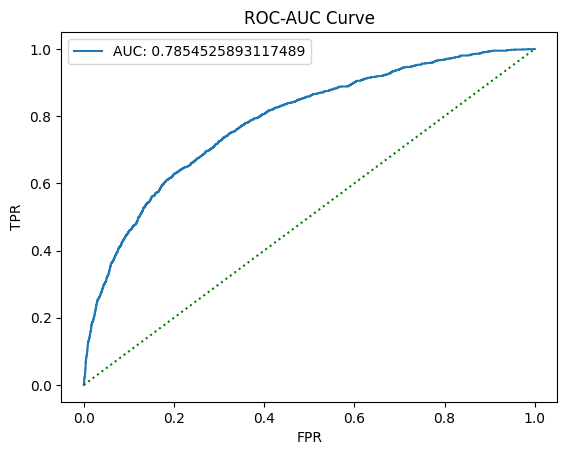

In [74]:
fpr,tpr,thresh = roc_curve(y_test,ypred_lr1_prob[:,1])
auc_score = roc_auc_score(y_test,ypred_lr1_prob[:,1])
plt.plot(fpr,tpr,label='AUC: '+str(auc_score))
plt.plot([0,1],[0,1],color='green',linestyle='dotted')
plt.title('ROC-AUC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

#### Best Threshold

In [78]:
best_thresh1 = thresh[np.argmax(tpr*(1-fpr))]
print(best_thresh1)

0.19203939776564205


In [79]:
best_thresh2 = thresh[np.argmax(abs(tpr-fpr))]
print(best_thresh2)

0.26994687911716303


In [81]:
ypred_lr2 = np.where(ypred_lr1_prob[:,1]>best_thresh2,1,0)
print(ypred_lr2)

[0 0 0 ... 1 1 0]


In [82]:
acc_lr2 = accuracy_score(y_test,ypred_lr2)
pre_lr2 = precision_score(y_test,ypred_lr2)
rec_lr2 = recall_score(y_test,ypred_lr2)

lr2_res = pd.DataFrame({'Model':'LogReg_m2(Thresh=0.269)','Acc':acc_lr2,
                   'Precision':pre_lr2,'Recall':rec_lr2},index=[1])
lr2_res

,Model,Acc,Precision,Recall
1,LogReg_m2(Thresh=0.269),0.763505,0.458711,0.628105


In [83]:
res = pd.concat([lr1_res,lr2_res])
res

,Model,Acc,Precision,Recall
0,LogReg_m1,0.814331,0.619283,0.327451
1,LogReg_m2(Thresh=0.269),0.763505,0.458711,0.628105


In [89]:
def gen_model_res(ypred,thresh=None):
    acc = accuracy_score(y_test,ypred)
    pre = precision_score(y_test,ypred)
    rec = recall_score(y_test,ypred)
    lr_res = pd.DataFrame({'Model':f'LogReg(Thresh={thresh})','Acc':acc,
                   'Precision':pre,'Recall':rec},index=[100])
    return lr_res

In [90]:
ypred_lr3 = np.where(ypred_lr1_prob[:,1]>best_thresh1,1,0)
print(ypred_lr3)

[0 0 0 ... 1 1 0]


In [91]:
lr3_res = gen_model_res(ypred_lr3,best_thresh1)
lr3_res

,Model,Acc,Precision,Recall
100,LogReg(Thresh=0.19203939776564205),0.699486,0.390311,0.737255


In [92]:
res = pd.concat([res,lr3_res])
res

,Model,Acc,Precision,Recall
0,LogReg_m1,0.814331,0.619283,0.327451
1,LogReg_m2(Thresh=0.269),0.763505,0.458711,0.628105
100,LogReg(Thresh=0.19203939776564205),0.699486,0.390311,0.737255
100,LogReg(Thresh=0.19203939776564205),0.699486,0.390311,0.737255


In [93]:
res = res[:-1]
res

,Model,Acc,Precision,Recall
0,LogReg_m1,0.814331,0.619283,0.327451
1,LogReg_m2(Thresh=0.269),0.763505,0.458711,0.628105
100,LogReg(Thresh=0.19203939776564205),0.699486,0.390311,0.737255


### Feature Selection using RFE (Recursive Feature Elimination)

#### RFE (Recursive Feature Elimination)

1) The process involves developing a model with the remaining features after repeatedly removing the least significant parts until the desired number of features is obtained.<br>
2) First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute (such as coef_, feature_importances_) or callable. <br>
3) Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [94]:
from sklearn.feature_selection import RFE

In [96]:
print(len(x_train.columns))
print(x_train.columns)

36
Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'age_bracket_35 - 44 Years',
       'age_bracket_45 - 54 Years', 'age_bracket_55 - 64 Years',
       'age_bracket_65+ Years', 'qualification_< 12 Years',
       'qualification_College Graduate', 'qualification_Some College',
       'race_Hispanic', 'race_Other or Multiple', 'race_White', 'sex_Male',
       'marital_status_Not Married', 'employment_Not in Labor Force',
       'employment_Unemployed', 'census_msa_MSA, Principle City',
       'census_msa_Non-MSA'],
      dtype='object')


In [103]:
lr4 = LogisticRegression(max_iter=10000)

rfe = RFE(lr4, n_features_to_select=20)
rfe = rfe.fit(x_train, y_train)

print(rfe.support_)
print(rfe.ranking_)
print('Extracted Feature',x_train.columns[rfe.support_])

[ True  True  True False  True False  True False False  True  True  True
  True  True False False  True False False False False False  True  True
  True  True  True False  True  True  True  True False False False False]
[ 1  1  1 11  1  7  1  4  6  1  1  1  1  1 13  2  1  8 12 14 15 16  1  1
  1  1  1  3  1  1  1  1 10 17  5  9]
Extracted Feature Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'bought_face_mask', 'avoid_large_gatherings', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'is_seas_risky', 'age_bracket_55 - 64 Years',
       'age_bracket_65+ Years', 'qualification_< 12 Years',
       'qualification_College Graduate', 'qualification_Some College',
       'race_Other or Multiple', 'race_White', 'sex_Male',
       'marital_status_Not Married'],
      dtype='object')


In [104]:
lr4 = LogisticRegression(max_iter=10000)
lr4.fit(x_train[x_train.columns[rfe.support_]], y_train)

LogisticRegression(max_iter=10000)

In [105]:
ypred_lr4 = lr4.predict(x_test[x_train.columns[rfe.support_]])

In [106]:
lr4_res = gen_model_res(ypred_lr4,thresh=0.5)
lr4_res

,Model,Acc,Precision,Recall
100,LogReg(Thresh=0.5),0.814609,0.622951,0.322876


In [107]:
res = pd.concat([res,lr4_res])
res

,Model,Acc,Precision,Recall
0,LogReg_m1,0.814331,0.619283,0.327451
1,LogReg_m2(Thresh=0.269),0.763505,0.458711,0.628105
100,LogReg(Thresh=0.19203939776564205),0.699486,0.390311,0.737255
100,LogReg(Thresh=0.5),0.814609,0.622951,0.322876


In [111]:
res.index = list(range(4))
res

,Model,Acc,Precision,Recall
0,LogReg_m1,0.814331,0.619283,0.327451
1,LogReg_m2(Thresh=0.269),0.763505,0.458711,0.628105
2,LogReg(Thresh=0.19203939776564205),0.699486,0.390311,0.737255
3,LogReg(Thresh=0.5),0.814609,0.622951,0.322876


In [113]:
res.set_index('Model',inplace=True)
res

,Acc,Precision,Recall
Model,,,
LogReg_m1,0.814331,0.619283,0.327451
LogReg_m2(Thresh=0.269),0.763505,0.458711,0.628105
LogReg(Thresh=0.19203939776564205),0.699486,0.390311,0.737255
LogReg(Thresh=0.5),0.814609,0.622951,0.322876


In [118]:
def display_df():
    return df.head()

In [120]:
def fun(n):
    print(n+2)


In [121]:
fun(5)

7


In [119]:
a = display_df()
a

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,...,age_bracket,qualification,race,sex,marital_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,55 - 64 Years,< 12 Years,White,Female,Not Married,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,35 - 44 Years,12 Years,White,Male,Not Married,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,18 - 34 Years,College Graduate,White,Male,Not Married,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,65+ Years,12 Years,White,Female,Not Married,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,45 - 54 Years,Some College,White,Female,Married,Employed,"MSA, Not Principle City",1.0,0.0,0


In [122]:
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,...,age_bracket,qualification,race,sex,marital_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,55 - 64 Years,< 12 Years,White,Female,Not Married,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,35 - 44 Years,12 Years,White,Male,Not Married,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,18 - 34 Years,College Graduate,White,Male,Not Married,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,65+ Years,12 Years,White,Female,Not Married,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,45 - 54 Years,Some College,White,Female,Married,Employed,"MSA, Not Principle City",1.0,0.0,0


In [128]:
res1 = df.groupby('race').agg({'no_of_adults':['min','max','var'],
                             'h1n1_vaccine':['sum','mean','std']})
res1

no_of_adults                h1n1_vaccine                    
                           min  max       var          sum      mean       std
race                                                                          
Black                      0.0  3.0  0.686955          279  0.148721  0.355908
Hispanic                   0.0  3.0  0.726150          327  0.210019  0.407453
Other or Multiple          0.0  3.0  0.703963          302  0.216643  0.412105
White                      0.0  3.0  0.518649         4248  0.221538  0.415293